# Amazon Sales Report

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('amazon_sales.csv')

In [28]:
df.shape

(37514, 19)

In [31]:
df.head()


,Index,Order ID,Date,Status,Fulfilment,Sales Channel,Ship-Service-Level,Category,Size,Courier Status,Quantity,Currency,Amount,Ship-City,Ship-State,Ship-Postal-Code,Ship-Country,B2B,Fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032,IN,False,Easy Ship
12,12,405-5513694-8146768,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606,IN,False,Easy Ship


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   Ship-Service-Level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  Currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  Ship-City           128941 non-null  object 
 14  Ship-State          128941 non-null  object 
 15  Ship-Postal-Code    128941 non-nul

In [6]:
pd.isnull(df)

,Index,Order ID,Date,Status,Fulfilment,Sales Channel,Ship-Service-Level,Category,Size,Courier Status,Qty,Currency,Amount,Ship-City,Ship-State,Ship-Postal-Code,Ship-Country,B2B,Fulfilled-by
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128972,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128973,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128974,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [7]:
pd.isnull(df).sum()

Index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
Ship-Service-Level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
Currency               7800
Amount                 7800
Ship-City                35
Ship-State               35
Ship-Postal-Code         35
Ship-Country             35
B2B                       0
Fulfilled-by          89713
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(37514, 19)

In [10]:
df.columns

Index(['Index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'Ship-Service-Level', 'Category', 'Size', 'Courier Status', 'Qty',
       'Currency', 'Amount', 'Ship-City', 'Ship-State', 'Ship-Postal-Code',
       'Ship-Country', 'B2B', 'Fulfilled-by'],
      dtype='object')

In [11]:
df['Ship-Postal-Code']=df['Ship-Postal-Code'].astype('int')

df['Ship-Postal-Code'].dtype

dtype('int64')

In [12]:
df.rename(columns={'Qty' : 'Quantity'}, inplace=True)

In [13]:
df.columns

Index(['Index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'Ship-Service-Level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'Currency', 'Amount', 'Ship-City', 'Ship-State', 'Ship-Postal-Code',
       'Ship-Country', 'B2B', 'Fulfilled-by'],
      dtype='object')

In [14]:
df.describe()

,Index,Quantity,Amount,Ship-Postal-Code
count,37514.000000,37514.000000,37514.000000,37514.000000
mean,60953.809858,0.867383,646.553960,463291.552754
std,36844.853039,0.354160,279.952414,194550.425637
min,0.000000,0.000000,0.000000,110001.000000
25%,27235.250000,1.000000,458.000000,370465.000000
50%,63470.500000,1.000000,629.000000,500019.000000
75%,91790.750000,1.000000,771.000000,600042.000000
max,128891.000000,5.000000,5495.000000,989898.000000


In [15]:
df.describe(include='object')

,Order ID,Date,Status,Fulfilment,Sales Channel,Ship-Service-Level,Category,Size,Courier Status,Currency,Ship-City,Ship-State,Ship-Country,Fulfilled-by
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,91,11,1,1,1,8,11,3,1,4698,58,1,1
top,171-5057375-2831560,04-25-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,697,28741,37514,37514,37514,14062,6806,31859,37514,2839,6236,37514,37514


In [16]:
df[['Quantity', 'Amount']].describe()

,Quantity,Amount
count,37514.000000,37514.000000
mean,0.867383,646.553960
std,0.354160,279.952414
min,0.000000,0.000000
25%,1.000000,458.000000
50%,1.000000,629.000000
75%,1.000000,771.000000
max,5.000000,5495.000000


# Exploratory Data Analysis

In [17]:
df.columns

Index(['Index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'Ship-Service-Level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'Currency', 'Amount', 'Ship-City', 'Ship-State', 'Ship-Postal-Code',
       'Ship-Country', 'B2B', 'Fulfilled-by'],
      dtype='object')

## Size

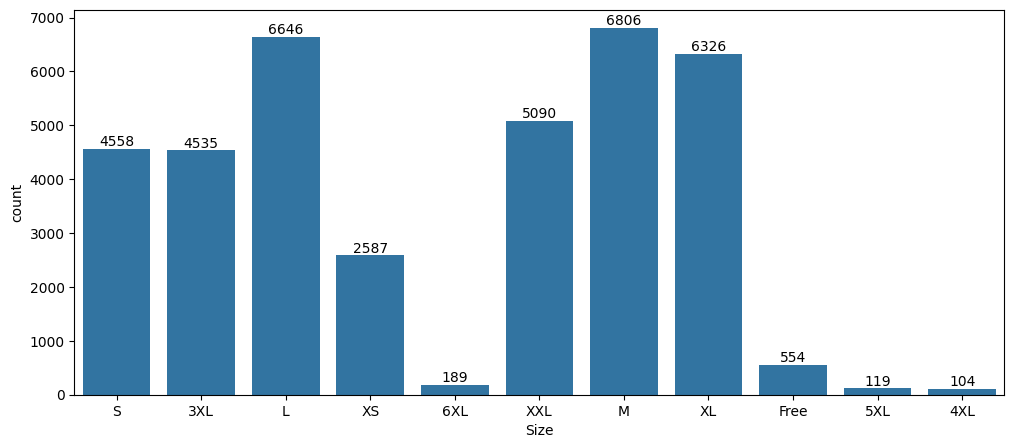

In [18]:
plt.figure(figsize=(12,5))
ax=sns.countplot(x='Size', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

#### Note: From above graph, you can see that most of the people buys M-size.

## Group By

In [19]:
df.groupby(['Size'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)

,Size,Quantity
6,M,5905
5,L,5795
8,XL,5481
10,XXL,4465
0,3XL,3972
7,S,3896
9,XS,2191
4,Free,467
3,6XL,170
2,5XL,104


<Axes: xlabel='Size', ylabel='Quantity'>

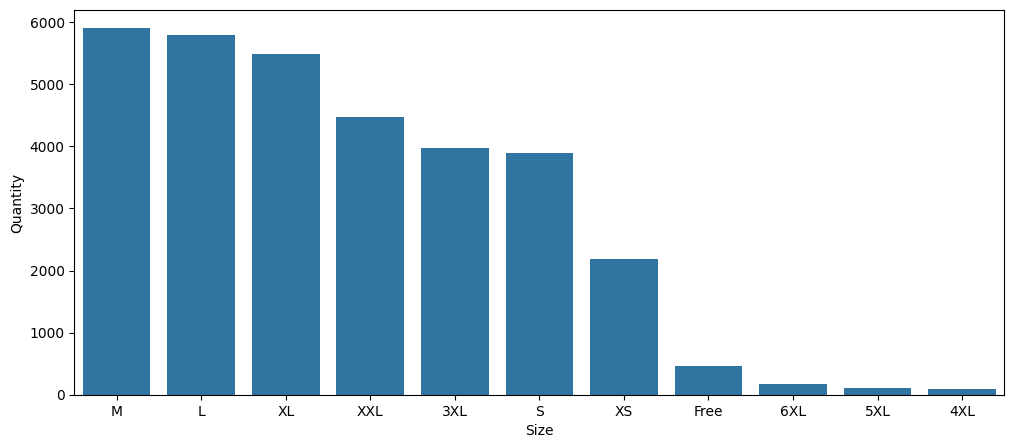

In [20]:
plt.figure(figsize=(12,5))
S_Quantity=df.groupby(['Size'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
sns.barplot(x='Size', y='Quantity', data=S_Quantity)

## Courier Status

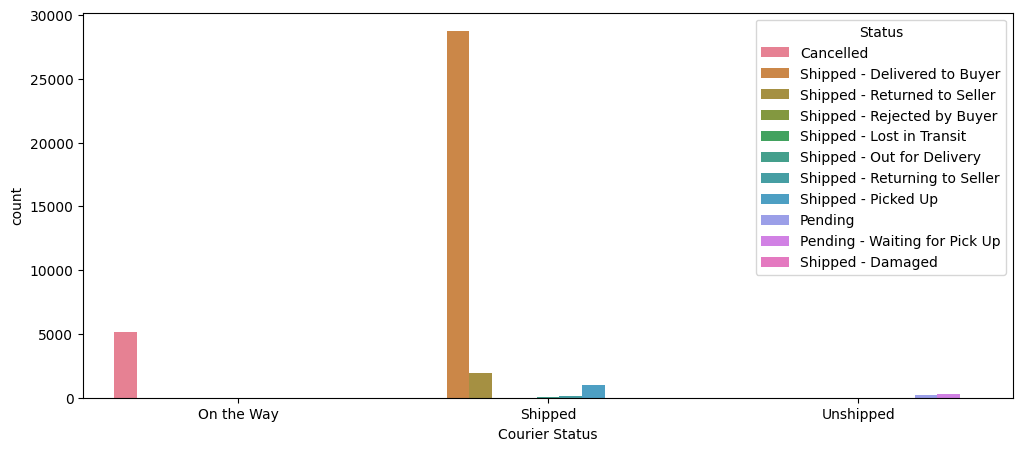

In [21]:
plt.figure(figsize=(12,5))
ax=sns.countplot(x='Courier Status', data=df, hue='Status')
plt.show()

### Histogram

<Axes: >

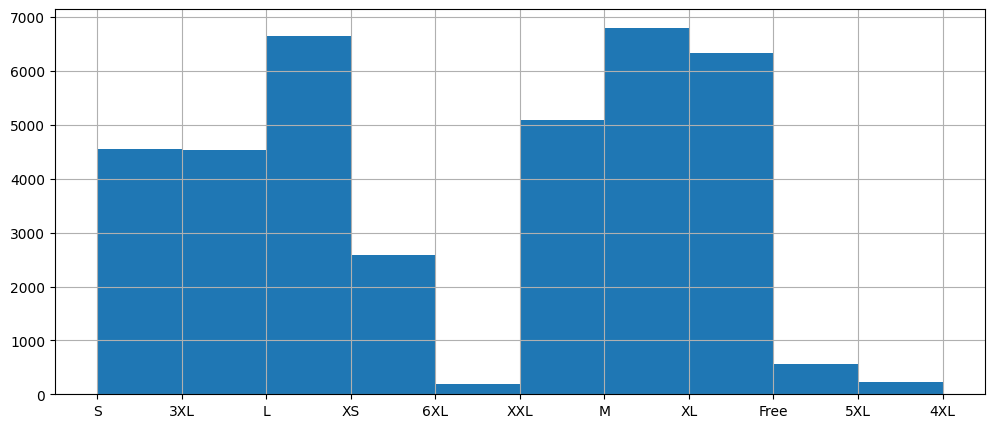

In [22]:
plt.figure(figsize=(12,5))
df['Size'].hist()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               37514 non-null  int64  
 1   Order ID            37514 non-null  object 
 2   Date                37514 non-null  object 
 3   Status              37514 non-null  object 
 4   Fulfilment          37514 non-null  object 
 5   Sales Channel       37514 non-null  object 
 6   Ship-Service-Level  37514 non-null  object 
 7   Category            37514 non-null  object 
 8   Size                37514 non-null  object 
 9   Courier Status      37514 non-null  object 
 10  Quantity            37514 non-null  int64  
 11  Currency            37514 non-null  object 
 12  Amount              37514 non-null  float64
 13  Ship-City           37514 non-null  object 
 14  Ship-State          37514 non-null  object 
 15  Ship-Postal-Code    37514 non-null  int64  
 16  Ship-Cou

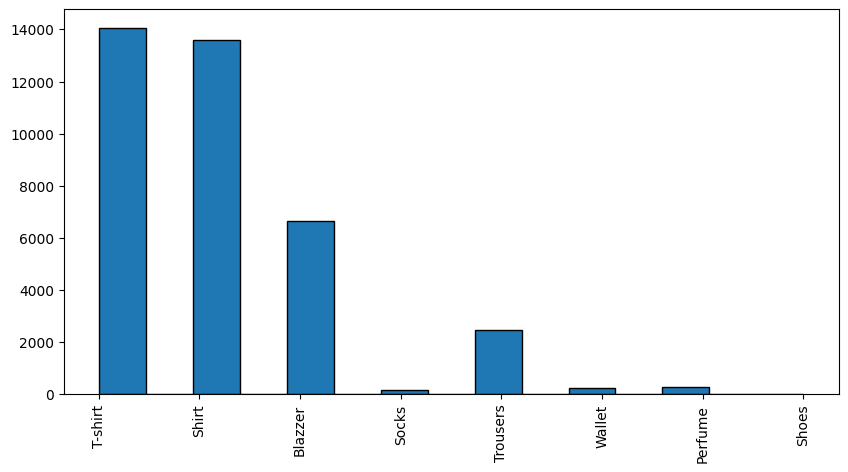

In [24]:
df['Category']=df['Category'].astype(str)
column_data= df['Category']
plt.figure(figsize=(10,5))
plt.hist(column_data, bins=15, edgecolor='Black')
plt.xticks(rotation=90)
plt.show()

### Pie Chart

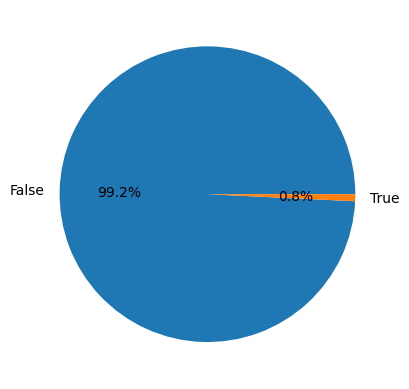

In [25]:
B2B_Check=df['B2B'].value_counts()

plt.pie(B2B_Check, labels=B2B_Check.index, autopct= '%1.1f%%')

plt.show()

### Scatter Plot

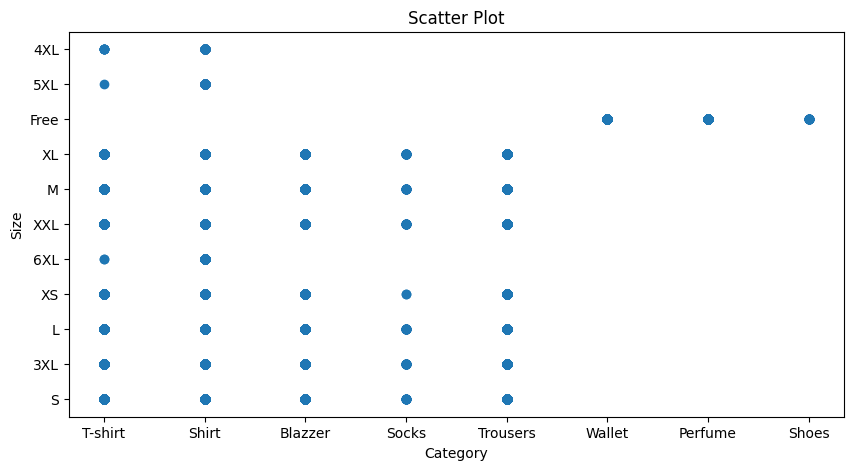

In [26]:
x_data=df['Category']
y_data=df['Size']

plt.figure(figsize=(10,5))
plt.scatter(x_data, y_data)
plt.xlabel('Category')
plt.ylabel('Size')
plt.title('Scatter Plot')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

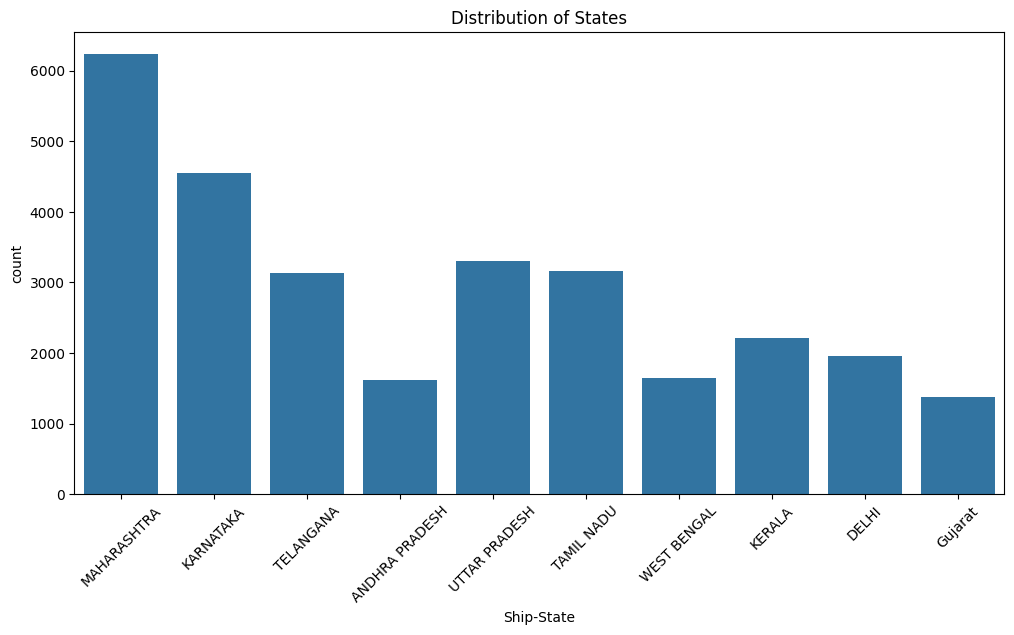

In [27]:
top_10_state=df['Ship-State'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.countplot(data=df[df['Ship-State'].isin(top_10_state.index)], x='Ship-State')
plt.title('Distribution of States')
plt.xticks(rotation=45)
plt.show

# Conclusion

#### The data analysis reveals that the business has a significant customer base in Maharashtra state, mainly serves retailers, fulfills orders through Amazon, expences high demand for T-shirts, and sees M-size as the preferred choice among buyers.